<a href="https://colab.research.google.com/github/chiragbaswala/MY_PORTFOLIO_PROJECTS/blob/main/Data_Visualization_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Visualisation: Portfolio**
---

## **INRODUCTION**

In this portfolio, I showcase a diverse collection of visualizations crafted from four distinct datasets, each offering unique insights into various domains. These datasets include information from Airbnb, Netflix, a Superstore dataset, and a Masculinity Survey dataset. Employing a range of visualization techniques, I utilize bar charts, stacked bars, scatterplot, line charts, pie charts, heatmaps, histograms, and progressively advanced graphs such as geospatial analysis and Sankey diagrams. Through this compilation, I aim to present data in an engaging and informative manner, leveraging visualization principles to convey complex information effectively.I showcase my proficiency in data visualization through four datasets sourced from Kaggle, each licensed to their respective owners.

---

## **Importing the necessary libraries**

---

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.colors as c
import plotly.express as px
import plotly.io as pio
from wordcloud import WordCloud , STOPWORDS
from PIL import Image

## **Reading all Datasets**

---

In [2]:
df_Weather = pd.read_csv('GlobalWeatherRepository.csv')
df_Perth = pd.read_csv('perth_houses.csv')
df_netflix = pd.read_csv('netflix_titles.csv')
df_superstore = pd.read_csv('SampleSuperstore.csv')
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# Calculating The number of missing values
missing_values = df_netflix.isnull().sum()
missing_values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
# Remove duplicate rows from df_airbnb and update it in place
df_netflix.drop_duplicates(inplace = True)
df_netflix.shape

(8807, 12)

## **Bar Plots**

---

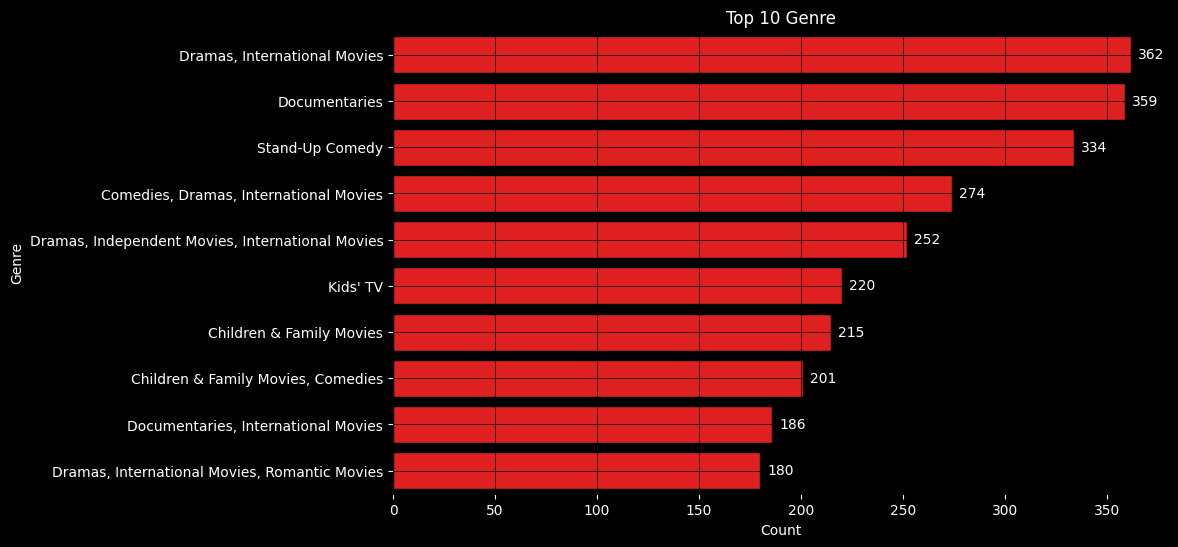

In [5]:
# Group the data by 'listed_in' and count the occurrences of each genre
listed_in = df_netflix.groupby(['listed_in'])['listed_in'].value_counts().nlargest(10).reset_index()

# Create a figure and axis object
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'count', y = 'listed_in', data = listed_in, color = 'red', edgecolor = 'black')

# Customize the plot
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Add title and labels
plt.title('Top 10 Genre', color = 'white')
plt.xlabel('Count', color = 'white')
plt.ylabel('Genre', color = 'white')
ax.tick_params(colors = 'white')

# Add grid lines
ax.grid(color = 'black', linestyle = '-', linewidth = 0.5)

# Customize the spines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center', fontsize = 10, color = 'white', xytext = (5, 0),
                textcoords = 'offset points')

 **Figure 1 : Horizontal bar of Top 10 Genre in Netflix Movies and Tv Shows**

The code that I've written above groups and counts the top 10 genres in the df_netflix DataFrame that builds a ranking list for most popular content categories within the Netflix dataset by creating a bar chart that shows the top 10 genres. The code creates a visual representation with individual bars for each genre, after analyzing the data and to determine which all genres occur most frequently. Each bar's length reflects how often that genre appears in the data, and for clarity, the precise count is shown at the end of each bar. The above depiction provides a simple yet effective means of visualizing the most common content categories in the Netflix catalogue, enabling quick analysis of the genres.


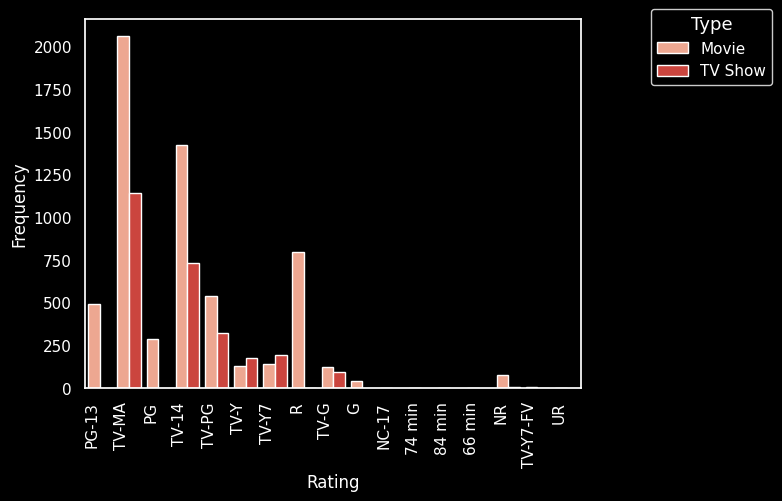

In [6]:
# Create a figure with a black background
plt.figure(dpi = 100, facecolor = 'black')

# Set the style to 'darkgrid' and customize the axes facecolor
sns.set(style = 'darkgrid', rc = {'axes.facecolor': 'black'})

# Create a countplot of 'rating' with 'type' as the hue variable
sns.countplot(x = 'rating', hue = 'type', data = df_netflix, palette = 'Reds')

# Customize the x-axis ticks
plt.xticks(rotation = 90, color = 'white', ha = 'right')

# Customize the y-axis ticks
plt.yticks(color = 'white')

# Add labels to the axes
plt.xlabel('Rating', color = 'white')
plt.ylabel('Frequency', color = 'white')

# Add a legend with a custom location and title
legend = plt.legend(title = 'Type', loc = 'lower right', bbox_to_anchor = (1.4, .80),
                    facecolor = 'black', edgecolor = 'white', title_fontsize = '13',
                    fontsize = '11', labelcolor = 'white')

# Remove the grid lines
plt.gca().grid(False)

# Set the legend title color to white
legend.get_title().set_color('white')

# Show the plot
plt.show()

**Figure 2 : Countplot of Ratings of Movies and Tv Shows**

The  code that I've written above, creates a bar chart showing the frequency of different ratings for various types of Disney content. It starts by setting up a figure and applying Seaborn's theme. The count plot displays 'rating' on the x-axis and 'type' categories in different colors, on the y-axis sns.countplot() function is used to display the frequency and the axes are labeled as 'Rating' and 'Frequency'. Also, a legend is placed outside the plot area to make the color coding of content types easier to understand. Finally, the plot is displayed, allowing for easy comparison of rating frequencies across different content types in the Netflix dataset.

In [7]:
# Group the data by country and condition, and count the number of reports
country_condition_counts = df_Weather.groupby(['country', 'condition_text']).size().reset_index(name='Categorical Count')

# Get the top 9 countries with the most weather reports
most_reported_countries = country_condition_counts.groupby('country')['Categorical Count'].sum().sort_values(ascending=False).head(9).index

# Get the top 5 most common weather conditions
most_common_conditions = country_condition_counts.groupby('condition_text')['Categorical Count'].sum().sort_values(ascending=False).head(5).index

# Filter the data to only include the top 9 countries and top 5 conditions
top_countries_conditions = country_condition_counts[(country_condition_counts['country'].isin(most_reported_countries)) & (country_condition_counts['condition_text'].isin(most_common_conditions))]

# Create a stacked bar chart using Plotly
fig = px.bar(top_countries_conditions, x='country', y='Categorical Count', color='condition_text',
             title="Categorical Count by Country and Condition (Top 9 Countries, Top 5 Conditions)",
             barmode='stack')

# Customize the layout of the chart
fig.update_layout(height=600, width=1000,
                  plot_bgcolor="white",
                  legend_title_text='Weather Condition')

# Display the chart
fig.show()

**Figure 3 : Stacked Bar based on Top 9 Countries with Top 5 Weather Conditions**

The code that I've written above helped me to create a stacked bar chart to show the weather in different countries. First, it counts the occurrences of various weather conditions after sorting the data by country and weather type. Then, it identifies the five most common weather conditions and the nine countries with the most weather reports. To keep the visualization clear and informative, it focuses on these top countries and weather events. Using Plotly Express, I've created a stacked bar chart where each bar represents a country, and each segment shows the number of different weather conditions. The legend indicates the color associated with each weather type. This visualization makes it easy to compare the frequency of different weather conditions among the most frequently reported countries, helping to spot patterns or deviations in the weather.

## **Line Graphs**
---

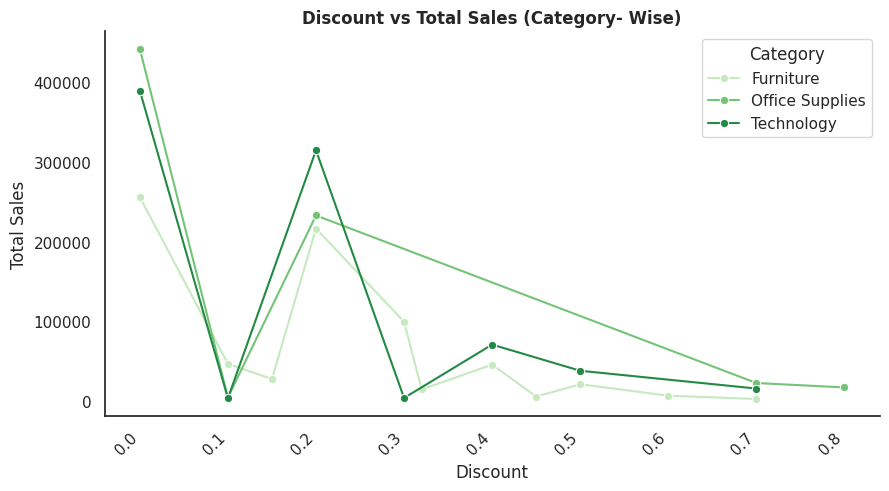

In [8]:
# Group the data by 'Discount' and 'Category', and calculate the sum of 'Sales'
cat_discount = df_superstore.groupby(['Discount','Category'])['Sales'].sum().reset_index()

# Set the seaborn style to 'white'
sns.set_style('white')

# Create a figure with a white background
plt.figure(figsize = (10, 5), facecolor = 'white')

# Create a lineplot of 'Discount' vs 'Sales' with 'Category' as the hue variable
sns.lineplot(data = cat_discount, x = 'Discount', y = 'Sales', hue = 'Category',
             palette = 'Greens', marker = 'o')

# Customize the x-axis label and ticks
plt.xlabel('Discount')
plt.xticks(rotation = 45, ha = 'right')

# Customize the y-axis label
plt.ylabel('Total Sales')

# Add a title to the plot
plt.title('Discount vs Total Sales (Category- Wise)', fontweight = 'bold')

# Add a legend with a custom title and location
plt.legend(title = 'Category', loc = 'upper right')

# Remove the grid lines
plt.grid(False)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

**Figure 4 : Line Graph of Discount For Different Categories**

 I've created a line chart comparing the effect of discounts on overall sales across various product categories in this superstore database. The data are aggregated by discount and category, then plotted using the Seaborn colors and markers for each category. The resulting display provides insight into how discounts affect sales in various product categories.

## **Scatter Plots**
---

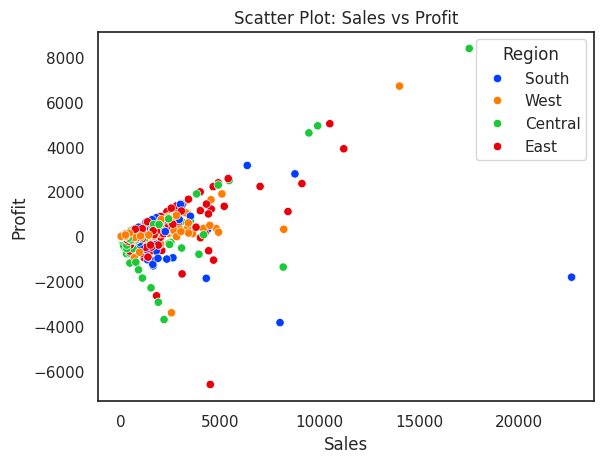

In [9]:
# Create a scatterplot of 'Sales' vs 'Profit' with 'Region' as the hue variable
sns.scatterplot(x = 'Sales', y = 'Profit', hue = 'Region', data = df_superstore,
                palette = 'bright')

# Add a title to the plot
plt.title('Scatter Plot: Sales vs Profit')

# Show the plot
plt.show()

**Figure 5 : Scatter Plot For Regional Sales and Profit**

 In order to analyse the relationship between sales and profits in the superstore dataset, a scatter plot has been created, with data points differentiated by region. Using Seaborn's scatterplot function, it visualizes sales on the x-axis, profit on the y-axis, and different regions represented by distinct colors. The title of the plot increases clarity and provides an overview of regional sales and profit relationships.

## **PIE CHART**

---


In [10]:
# Group the weather data by condition and calculate the average temperature
weather_condition = df_Weather.groupby('condition_text')['temperature_celsius'].agg(['mean']).reset_index()
weather_condition = weather_condition.rename(columns={'mean': 'temperature'})

# Sort the results in descending order by temperature and select the top 15 conditions
weather_condition = weather_condition.sort_values(by='temperature', ascending=False).head(15)

# Create a pie chart to visualize the results
weather_fig = px.pie(
    weather_condition,
    names='condition_text',
    values='temperature',
    title='Weather Condition And Temperature',
    labels={
        'condition_text': 'Weather Condition',
        'temperature': 'Temperature (°C)'
    }
)

# Update the chart to display the text inside each slice and show the label and percentage
weather_fig.update_traces(textposition='inside', textinfo='label+percent')

# Display the chart
weather_fig.show()

**Figure 6 : Pie Plot showcasing Weather Conditions and Temperature**

I've created the pie chart above that shows the relationship between weather conditions and the average temperatures for those conditions. I grouped the weather data by conditions and calculated mean temperatures, then I selected only the top 15 of those conditions. With Plotly Express, I created a pie chart with wedges representing weather conditions where the size is based on average temperatures. I have set up custom labels and put in the title, where condition labels are shown within the wedges with percentages. This chart is useful in quickly identifying which conditions were associated with higher temperatures and how often they appear in my data set, effectively summarizing complex weather data.

## **GEOSPATIAL PLOTS**

---



In [11]:
# Filter the Perth houses dataset to exclude rows with missing build years
df_perth_houses_filtered = df_Perth.dropna(subset=['BUILD_YEAR'])

# Create a scatter mapbox plot of the filtered data
perthfig = px.scatter_mapbox(df_perth_houses_filtered,
                             lat='LATITUDE',
                             lon='LONGITUDE',
                             color='PRICE',
                             color_continuous_scale=px.colors.cyclical.IceFire,
                             size_max=15,
                             zoom=10,
                             hover_name='ADDRESS',
                             hover_data='BUILD_YEAR')

# Update the layout of the plot to use an open street map style and add a title
perthfig.update_layout(mapbox_style='open-street-map',
                       title='Fluctuation in Prices of Houses in Perth')

# Display the plot
perthfig.show()

**Figure 7 : Geospatial Graph visualizing the Fluctuation in prices of houses in Perth**

The above written code creates an interactive map to show housing costs in Perth, Australia. It filters out data entries without the build year and further, uses Plotly Express to create a scatter plot on a map, with each point representing a particular house where the points are colored to highlight the price variations. The map starts with a zoom level of 10 and uses the 'open-street-map' design for clarity. The title- 'Variation in House Prices in Perth', allows users to interact with the data points, and to navigate and zoom to help them compare house prices across different areas and to see how age and location affects the cost.

In [12]:
# Create a scatter mapbox plot of the weather data
weatherfig = px.scatter_mapbox(df_Weather,
                             lat="latitude",
                             lon="longitude",
                             color="temperature_celsius",
                             color_continuous_scale=px.colors.cyclical.IceFire,
                             size_max=10,
                             hover_name='location_name',
                             size="humidity",
                             zoom=1)

# Update the layout of the plot to use an open street map style and add a title
weatherfig.update_layout(mapbox_style='open-street-map',
                        title="Temperature and Humidity in Different Countries")

# Display the plot
weatherfig.show()

**Figure 8 : Geospatial Plot for Temperature and Humidity in Different Countries**

In this code, I'm plotting a worldwide weather map using Plotly Express. Each point on the map represents a weather station's location, with the point size indicating humidity levels and the color representing temperature. The map that I plotted is interactive, allowing users to hover over points to see place names. I've zoomed out the map to show the entire globe, using an open street map for clear geographic structure. This visualization effectively maps temperature and humidity across borders, as indicated by the title. It provides a clear, graphic way to view a lot of meteorological data, making it ideal for quickly illustrating global weather patterns.

## **SANKEY DIAGRAM**

---


In [13]:
# Group the data by 'Ship Mode', 'Segment', 'Category', and 'Sub-Category' and count the number of unique 'Postal Code' values
store = df_superstore.groupby(['Ship Mode', 'Segment', 'Category', 'Sub-Category'])['Postal Code'].count().reset_index()

In [14]:
# Get unique values for each column
shipping_methods = store['Ship Mode'].unique().tolist()
customer_segments = store['Segment'].unique().tolist()
product_categories = store['Category'].unique().tolist()
product_subcategories = store['Sub-Category'].unique().tolist()

# Create a list of all unique labels
labels = shipping_methods + customer_segments + product_categories + product_subcategories

# Define a function to get the index of a label
def get_label_index(label):
    return labels.index(label)

# Initialize lists to store source, target, and value for Sankey diagram
node_connections = []
connection_targets = []
connection_strengths = []

# Iterate over each row in the store dataframe
for _, row in store.iterrows():
    # Add edges for Ship Mode -> Segment, Segment -> Category, and Category -> Sub-Category
    node_connections.append(get_label_index(row['Ship Mode']))
    connection_targets.append(get_label_index(row['Segment']))
    connection_strengths.append(row['Postal Code'])

    node_connections.append(get_label_index(row['Segment']))
    connection_targets.append(get_label_index(row['Category']))
    connection_strengths.append(row['Postal Code'])

    node_connections.append(get_label_index(row['Category']))
    connection_targets.append(get_label_index(row['Sub-Category']))
    connection_strengths.append(row['Postal Code'])

# Create a Sankey diagram using Plotly
fig = go.Figure(data = [go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = 'black', width = 0.5),
        label = labels
    ),
    link = dict(
        source = node_connections,
        target = connection_targets,
        value = connection_strengths
    ))])

# Update the layout of the figure
fig.update_layout(title_text = 'Sankey Diagram of Superstore Data', font_size = 10)

# Show the figure
fig.show()

**Figure 9 :  Sankey Diagram from Superstore**

 To visualize the flow between 'Ship Mode', 'Segment', 'Category', and 'SubCategory' in a Superstore data set, this code creates a Sankey diagram. The first step is to extract the unique values from these columns and combine them into a single list of labels. Each label is mapped to an index by a helper function. As it iterates through the data set, source_target pairs representing connections between columns are created using postal code counts as their connection values. Plotly's 'go.Sankey' function is then used to create the diagram, with nodes representing unique labels and links defined by the source-target pairs and their values. The diagram is customized with padding, thickness, and label styles, and a title is added. The relationships and proportions of the various phases in Superstore's data flow are effectively highlighted by such a display.

## **HEATMAP**

---



In [15]:
# Select the numerical columns
num_cols = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR']

# Calculate the correlation matrix
corr_matrix = df_Perth[num_cols].corr().round(1)

# Print the correlations with the PRICE variable, sorted by absolute value
print(corr_matrix['PRICE'].sort_values(ascending=False))

# Create a heatmap using Plotly
heat_map_fig = px.imshow(corr_matrix, template="seaborn", text_auto=True)

# Customize the layout of the heatmap
heat_map_fig.update_layout(xaxis_rangeslider_visible=False,
                      autosize=False,
                      width=1150,
                      height=700,
                      title={
                            'text': "Correlation of Numerical Variables"}
                    )

# Display the heatmap
heat_map_fig.show()

PRICE         1.0
FLOOR_AREA    0.5
BATHROOMS     0.4
BEDROOMS      0.3
LAND_AREA     0.1
BUILD_YEAR   -0.2
Name: PRICE, dtype: float64


**Figure 10 : Heatmap of Perth Houses Dataset**

In the above heatmap, I'm taking a look at the relationships between the numerical variables in my Perth housing dataset. I created a correlation matrix with the following columns: build year, land area, floor area, bedrooms, and bathrooms. In order to determine which elements have the most influence on property prices, I specifically highlighted connections pertaining to 'PRICE'. Next, I generated a heatmap of the entire correlation matrix using Plotly Express. For clarification, I've changed the heatmap's style and size and added a title.  This approach helped me quickly in spoting patterns and relationships in the data, which is crucial for understanding housing price trends in Perth.

## **HISTOGRAM**

---


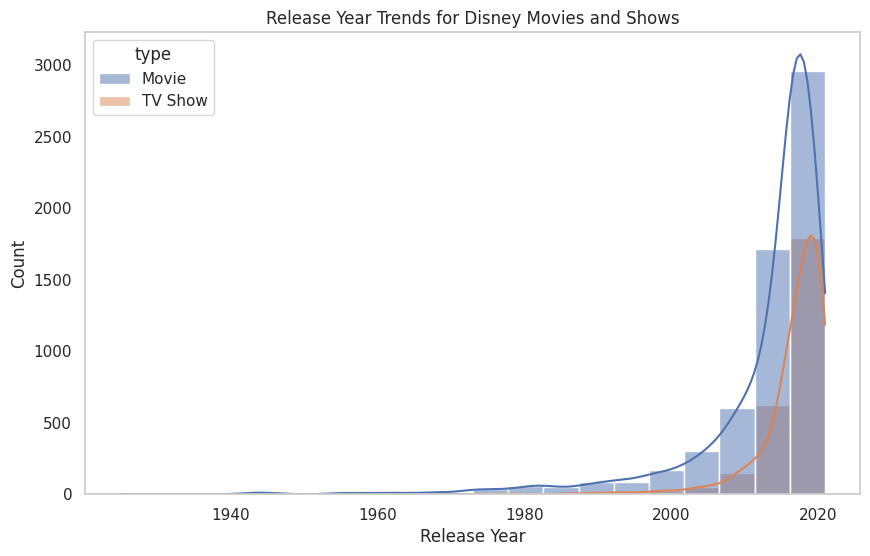

In [16]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Set the style for the plot using seaborn
sns.set()
sns.set_style("whitegrid")  # Set background color to white

# Create a histogram with seaborn
sns.histplot(df_netflix, x='release_year', hue='type', kde=True, bins=20)

# Customize the plot
plt.title('Release Year Trends for Disney Movies and Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Remove grid lines
plt.grid(False)

# Display the plot
plt.show()

**Figure 11 : Histogram showing Release Year Trends for Netflix Movies and Tv Shows**

In the above analysis, I've constructed a histogram showing the trends of Netflix movies which it shows by release year. I used Seaborn's histplot function, plotting 'release_year' on the x-axis, and count on the y-axis, specifying different types, probably movies and shows, by 'hue'. I added a title that describes what is plotted, and labelled the x and y axes appropriately, and, finally, put a legend to help distinguish between the types. The final plot is then displayed with the command plt.show(). It helped me to look at the trends in the number of Netflix releases over time and compare movies and shows.

## **WORD CLOUD**

---



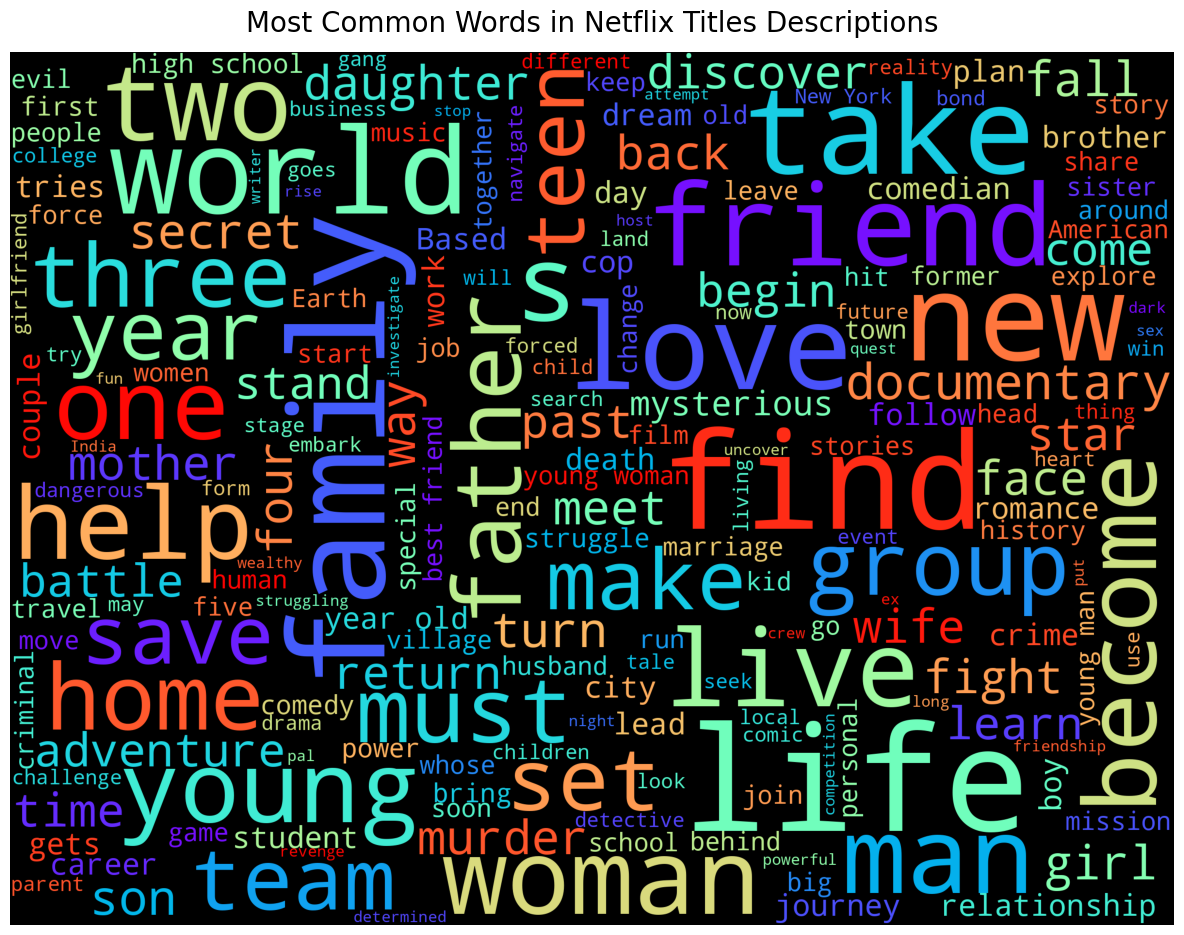

In [17]:
# Combine all the descriptions into a single string and remove stopwords
Netflix_Descriptions = ' '.join(df_netflix['description'].astype(str))
custom_stopwords = set(STOPWORDS).union({'series', 'show', 'episode', 'season', 'movie', 'movies'})

# Generate a word cloud using the WordCloud library
WC = WordCloud(
    width = 1200,
    height = 900,
    background_color = 'black',
    colormap = 'rainbow',
    stopwords = custom_stopwords,
    max_font_size = 150,
    min_font_size = 10,
    scale = 2
).generate(Netflix_Descriptions)

# Display the word cloud in a plot
fig, ax = plt.subplots(figsize = (12, 10))
ax.imshow(WC)
ax.axis('off')

# Add a title to the plot
plt.title('Most Common Words in Netflix Titles Descriptions', fontsize = 20, color = 'black', pad = 15)

# Tighten the layout and display the plot
plt.tight_layout()
plt.show()

# Save the word cloud as a PNG file
WC.to_file('Netflix_plus_wordcloud.png')

**Figure 12 : Word Cloud For Netflix**

The code that I created above is a word cloud that visualize the most frequently used words in Netdlix title descriptions. At first, I combined all the descriptions from my Netflix dataset into one long string and then set up a custom list of stopwords—common words like ‘series’, ‘show’, and ‘movie’—that I want to exclude from the word cloud because they are too general. The word cloud that I created is large with a black background and a rainbow color scheme where font size varies by word frequency. After generating the word cloud, I prepared a matplotlib figure to display it without axes and includes a title. And lastly, the image is saved as ‘Netflix_wordcloud.png’. This visualization highlights prevalent words and themes in Netflix content descriptions.

## **CONCLUSION**

---



To effectively present the data, we conducted nearly 12 different analysis using various visualization techniques. These include Bar graphs, Line Graphs, Scatter Plot, Pie chart, Histogram, Heatmap, Geospatial representations, Sankey diagram, and Word cloud. Each visualization demonstrates key concepts of data visualization, such as clarity and accuracy. Together, they provide a comprehensive overview and in-depth study of data visualization techniques and their applications, showcasing how different methods can uncover patterns, trends, and insights within the data.

## **BIBLOGRAPHY**

---



https://plotly.com/python/pie-charts/

https://plotly.com/python/discrete-color/

https://plotly.com/python/scattermapbox/

https://plotly.com/python/builtin-colorscales/

https://www.geeksforgeeks.org/sankey-diagram-using-plotly-in-python/?ref

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://www.geeksforgeeks.org/generating-word-cloud-python/

https://plotly.com/chart-studio-help/stacked-bar-chart/

https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows?resource=download

https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository

https://www.kaggle.com/datasets/syuzai/perth-house-prices

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

https://plotly.com/python/range-slider/

https://plotly.com/python/reference/layout/xaxis/

https://www.programiz.com/python-programming/pandas/correlation

https://stackoverflow.com/questions/61152889/plotly-how-to-set-node-positions-in-a-sankey-diagram

https://plotly.com/python/figure-labels/

https://github.com/plotly/plotly.py/blob/master/doc/python/pie-charts.md

https://stackoverflow.com/questions/45083000/pandas-groupby-with-conditional-formula

https://plotly.com/python-api-reference/generated/plotly.express.scatter_mapbox.html

https://plotly.com/python/reference/layout/mapbox/

https://stackoverflow.com/questions/46864740/selecting-a-subset-using-dropna-to-select-multiple-columns

https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas

https://stackoverflow.com/questions/56231689/how-to-set-the-default-figure-size-and-dpi-of-all-plots-drawn-by-matplotlib-pyp

https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot

https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

https://stackoverflow.com/questions/60249807/python-isnull-sum-vs-isnull-count

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


